change indicators

In [26]:
import xarray as xr
import pandas as pd


In [27]:
# Paths to the NetCDF files
path_HAT = '2021-2050/future_tide_actual-value_2021-2050_HAT_v1.nc'
path_LAT = '2021-2050/future_tide_actual-value_2021-2050_LAT_v1.nc'
path_MSL = '2021-2050/future_tide_actual-value_2021-2050_MSL_v1.nc'
path_TR = '2021-2050/future_tide_actual-value_2021-2050_TR_v1.nc'
# Paths for ensemble statistics files
path_ensemble_mean_rp1 = '2021-2050/future_waterlevel_actual-value_2021-2050_rp1_ensemble-mean_best-fit_v1.nc'
path_ensemble_std_rp1 = '2021-2050/future_waterlevel_actual-value_2021-2050_rp1_ensemble-std_best-fit_v1.nc'
path_ensemble_mean_rp10 = '2021-2050/future_waterlevel_actual-value_2021-2050_rp10_ensemble-mean_best-fit_v1.nc'
path_ensemble_std_rp10 = '2021-2050/future_waterlevel_actual-value_2021-2050_rp10_ensemble-std_best-fit_v1.nc'

# Loading the datasets
ds_HAT = xr.open_dataset(path_HAT)
ds_LAT = xr.open_dataset(path_LAT)
ds_MSL = xr.open_dataset(path_MSL)
ds_TR = xr.open_dataset(path_TR)
# Loading ensemble statistics datasets
ds_ensemble_mean_rp1 = xr.open_dataset(path_ensemble_mean_rp1)
ds_ensemble_std_rp1 = xr.open_dataset(path_ensemble_std_rp1)
ds_ensemble_mean_rp10 = xr.open_dataset(path_ensemble_mean_rp10)
ds_ensemble_std_rp10 = xr.open_dataset(path_ensemble_std_rp10)


Merging Datasets

In [28]:
# Merging complementary datasets (HAT, LAT, MSL, and TR)
ds_merged = xr.merge([ds_HAT, ds_LAT, ds_MSL, ds_TR])


In [29]:
ds_merged.tail()

<xarray.Dataset>
Dimensions:               (stations: 5, time: 1)
Coordinates:
    station_x_coordinate  (stations) float64 139.6 139.2 139.1 37.75 37.95
    station_y_coordinate  (stations) float64 33.88 34.2 34.2 -46.98 -46.63
  * stations              (stations) uint16 43729 43730 43731 43732 43733
  * time                  (time) datetime64[ns] 2021-01-01
Data variables:
    HAT                   (time, stations) float32 ...
    LAT                   (time, stations) float32 ...
    MSL                   (time, stations) float32 ...
    TR                    (time, stations) float32 ...
Attributes: (12/34)
    Conventions:                   CF-1.6
    featureType:                   timeSeries
    id:                            GTSMv3_epoch_tidal_indicators
    naming_authority:              https://deltares.nl/en
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    title:                         tidal_indicators
    ...                            ...
    geospatial_vertical_positive:  up
    geospatial_vertical_min:       0.005
    geospatial_vertical_max:       8.796
    time_coverage_start:           2021-01-01 00:00:00
    time_coverage_end:             2050-01-01 00:00:00
    experiment:

Conversion to DataFrame for Specific Analysis

In [30]:
# Convert a specific dataset to DataFrame for detailed analysis
# Example: Convert the merged dataset to DataFrame
df_merged = ds_merged.to_dataframe().reset_index()


In [31]:
# drop the time column
df_merged = df_merged.drop(columns=['time'])

In [32]:
df_merged.tail()

,stations,station_x_coordinate,station_y_coordinate,HAT,LAT,MSL,TR
43114,43729,139.614,33.882,0.712,-1.060,0.172,1.088
43115,43730,139.204,34.204,0.782,-1.138,0.167,1.186
43116,43731,139.146,34.204,0.802,-1.176,0.166,1.221
43117,43732,37.749,-46.978,0.590,-0.590,0.175,0.722
43118,43733,37.954,-46.626,0.598,-0.591,0.177,0.724


Spatial Analysis with Geopandas

In [33]:
import geopandas as gpd

# Example: Convert the merged dataset to a GeoDataFrame
gdf_merged = gpd.GeoDataFrame(
    df_merged, 
    geometry=gpd.points_from_xy(df_merged.station_x_coordinate, df_merged.station_y_coordinate)
)


In [34]:
gdf_merged.tail()

,stations,station_x_coordinate,station_y_coordinate,HAT,LAT,MSL,TR,geometry
43114,43729,139.614,33.882,0.712,-1.060,0.172,1.088,POINT (139.61400 33.88200)
43115,43730,139.204,34.204,0.782,-1.138,0.167,1.186,POINT (139.20400 34.20400)
43116,43731,139.146,34.204,0.802,-1.176,0.166,1.221,POINT (139.14600 34.20400)
43117,43732,37.749,-46.978,0.590,-0.590,0.175,0.722,POINT (37.74900 -46.97800)
43118,43733,37.954,-46.626,0.598,-0.591,0.177,0.724,POINT (37.95400 -46.62600)


Descriptive Statistics:

In [35]:
# Descriptive statistics for the merged dataset
descriptive_stats = df_merged[['HAT', 'LAT', 'MSL', 'TR']].describe()
print(descriptive_stats)



                HAT           LAT           MSL            TR
count  43119.000000  43119.000000  43119.000000  43119.000000
mean       1.107043     -1.111986      0.146187      1.431590
std        0.980574      0.973062      0.082154      1.302047
min        0.005000     -7.393000     -0.474000      0.002000
25%        0.317000     -1.577000      0.143000      0.394000
50%        0.914000     -0.934000      0.159000      1.176000
75%        1.562000     -0.303000      0.171000      1.997000
max        8.796000     -0.004000      2.890000     10.756000


Distribution Plots:

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)


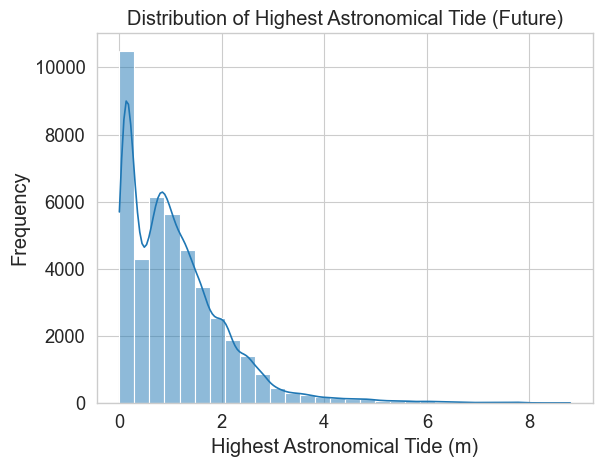

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Mean Sea Level (MSL)
sns.histplot(df_merged['HAT'], bins=30, kde=True)
plt.title('Distribution of Highest Astronomical Tide (Future)')
plt.xlabel('Highest Astronomical Tide (m)')
plt.ylabel('Frequency')
plt.show()

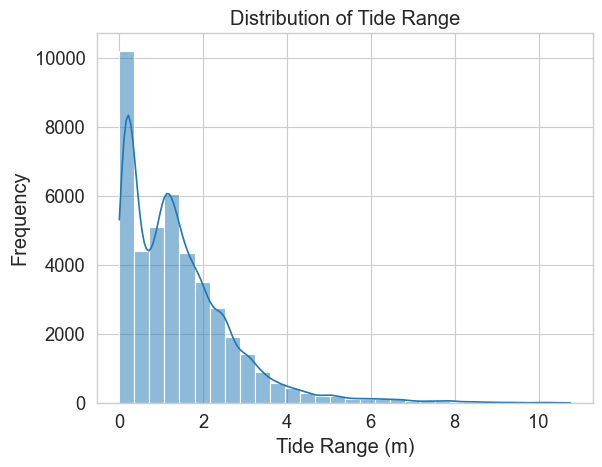

In [38]:
# Distribution of Mean Sea Level (MSL)
sns.histplot(df_merged['TR'], bins=30, kde=True)
plt.title('Distribution of Tide Range')
plt.xlabel('Tide Range (m)')
plt.ylabel('Frequency')
plt.show()

Box Plots:

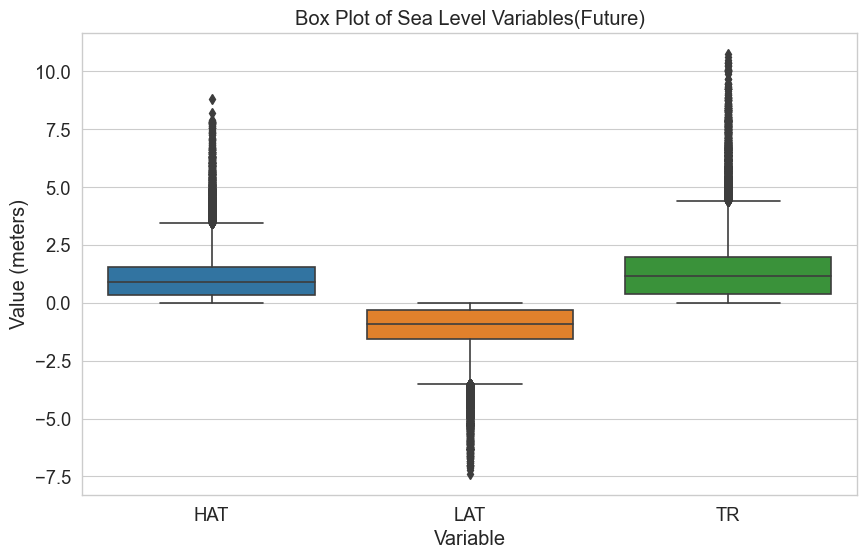

In [39]:
# Box plots for variables
variables = ['HAT', 'LAT', 'TR']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged[variables])
plt.title('Box Plot of Sea Level Variables(Future)')
plt.xlabel('Variable')
plt.ylabel('Value (meters)')
plt.show()


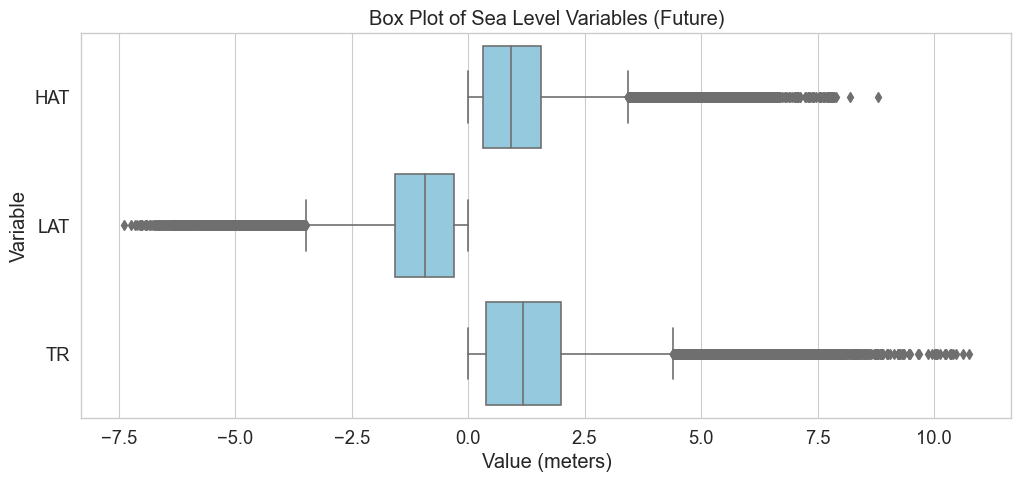

In [40]:

# Convert the data to a long-form or "tidy" format for use with seaborn
df_long = pd.melt(df_merged, value_vars=['HAT', 'LAT', 'TR'])

# Create a horizontal box plot
plt.figure(figsize=(12, 5))
sns.boxplot(x='value', y='variable', data=df_long, orient='h', color='skyblue')
plt.title('Box Plot of Sea Level Variables (Future)')
plt.xlabel('Value (meters)')
plt.ylabel('Variable')

# Adding a legend to denote the meaning of variables if colors were used
# As colors are not providing additional information, we are not adding a legend here

plt.show()


The box plot you have provided offers vital insights into the variables essential for understanding and monitoring sea level changes. Here's an analysis of the plot:

1. **Highest Astronomical Tide (HAT)**: The distribution is skewed towards the higher values, with a median slightly above 0 meters. This suggests that the highest tides are generally expected to be positive with respect to the mean sea level, with some outliers indicating exceptionally high tides.

2. **Lowest Astronomical Tide (LAT)**: The LAT values are distributed around a median that is negative, which is consistent with the definition of LAT as the lowest point of the tidal cycle. The spread of values is symmetric about the median, but the presence of outliers on both ends indicates that there are instances where the LAT can be significantly higher or lower than the typical range.

3. **Tide Range (TR)**: The tide range shows a wide distribution with a median close to 0 meters, reflecting the difference between high and low tides. The presence of outliers, particularly on the higher end, suggests that there can be significant variability in tide ranges, possibly due to geographic differences or storm surge events.

- **Indicators of Extremes**: HAT and LAT are critical for identifying areas most at risk from sea level rise, as they represent the extremes of high and low tides, which could exacerbate coastal flooding.

- **Ensemble Mean and Standard Deviation of Water Level**: Statistical measures, such as the mean and standard deviation, would provide a deeper understanding of variability and confidence in the projections.

The Sea Level Rise Monitoring Visualization project integrates these variables into a coherent narrative, emphasizing the importance of each factor in assessing risk and preparing for future sea level changes. The plot aligns with the project's goal to convey the complexities and variances inherent in sea level data, thereby informing better coastal management and climate change mitigation strategies.

In [16]:
# check the ensemble statistics datasets
ds_ensemble_mean_rp1.tail()

<xarray.Dataset>
Dimensions:                   (stations: 5)
Coordinates:
  * stations                  (stations) uint16 43729 43730 43731 43732 43733
    station_y_coordinate      (stations) float64 ...
    station_x_coordinate      (stations) float64 ...
Data variables:
    ensemble_mean_waterlevel  (stations) float64 ...
Attributes: (12/33)
    Conventions:                   CF-1.6
    featureType:                   timeSeries
    id:                            GTSMv3_ensemble_statistics
    naming_authority:              https://deltares.nl/en
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    title:                         Ensemble statistics for water levels
    ...                            ...
    geospatial_vertical_min:       0.054
    geospatial_vertical_max:       9.083
    geospatial_vertical_units:     m
    geospatial_vertical_positive:  up
    time_coverage_start:           2021
    time_coverage_end:             2050

In [17]:
# change the emsemble mean dataset to DataFrame
df_ensemble_mean_rp1 = ds_ensemble_mean_rp1.to_dataframe().reset_index()
df_ensemble_mean_rp10 = ds_ensemble_mean_rp10.to_dataframe().reset_index()

# change the emsemble std dataset to DataFrame
df_ensemble_std_rp1 = ds_ensemble_std_rp1.to_dataframe().reset_index()
df_ensemble_std_rp10 = ds_ensemble_std_rp10.to_dataframe().reset_index()

# check the dataframe
df_ensemble_mean_rp1.tail()

,stations,ensemble_mean_waterlevel,station_y_coordinate,station_x_coordinate
43114,43729,0.843,33.882,139.614
43115,43730,0.908,34.204,139.204
43116,43731,0.923,34.204,139.146
43117,43732,0.814,-46.978,37.749
43118,43733,0.816,-46.626,37.954


In [18]:
# !pip install basemap

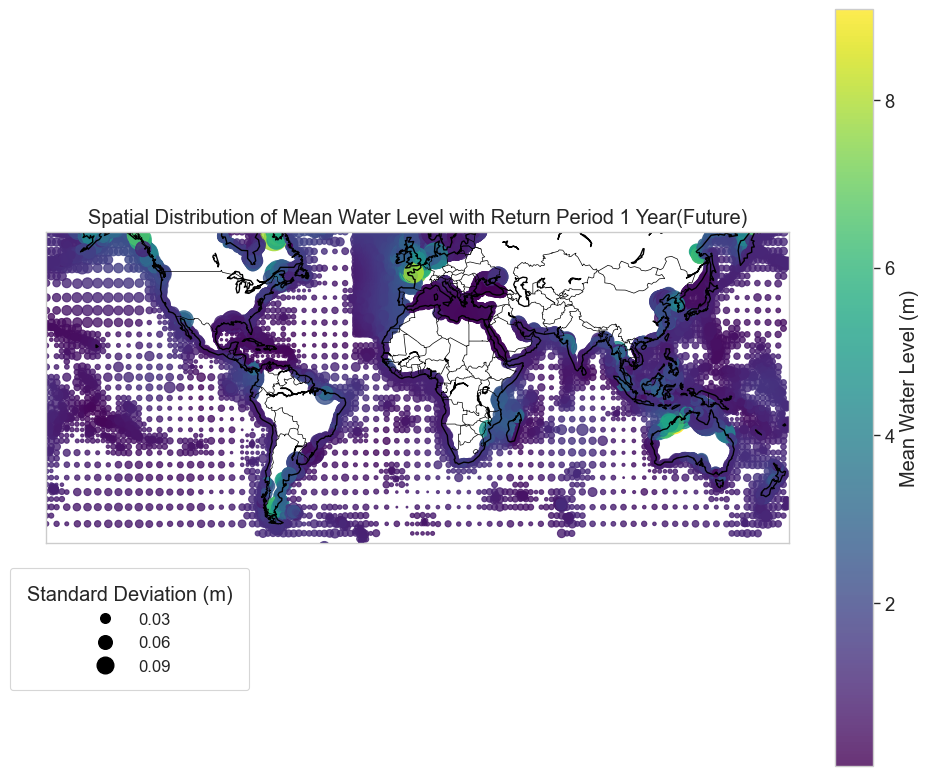

In [19]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter
scatter_size = df_ensemble_std_rp1['ensemble_std_waterlevel'].values * 1600  # Adjust size scaling factor as needed
sc = m.scatter(x, y, c=df_ensemble_mean_rp1['ensemble_mean_waterlevel'], s=scatter_size, cmap='viridis', alpha=0.8)

# Add a colorbar
plt.colorbar(sc, label='Mean Water Level (m)')

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import numpy as np
import pandas as pd


common_std_values = [0.03, 0.06, 0.09]  # Replace with your most common std dev values
# Calculate the scatter sizes for these common values
scatter_sizes_for_legend = [std_val * 1600 for std_val in common_std_values]

# Create legend handles with these sizes
handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                         markersize=np.sqrt(size), label=str(std_val)) 
           for size, std_val in zip(scatter_sizes_for_legend, common_std_values)]

# Adjust the legend's appearance and position it outside the bottom left of the plot
legend = plt.legend(handles=handles, title='Standard Deviation (m)', labelspacing=0.5, loc='lower left',
                    bbox_to_anchor=(-0.06, -0.5), handletextpad=1, borderpad=1, scatterpoints=1, fontsize='small')

# Improve layout
plt.tight_layout()

# Show the plot
plt.title('Spatial Distribution of Mean Water Level with Return Period 1 Year(Future)')
plt.show()



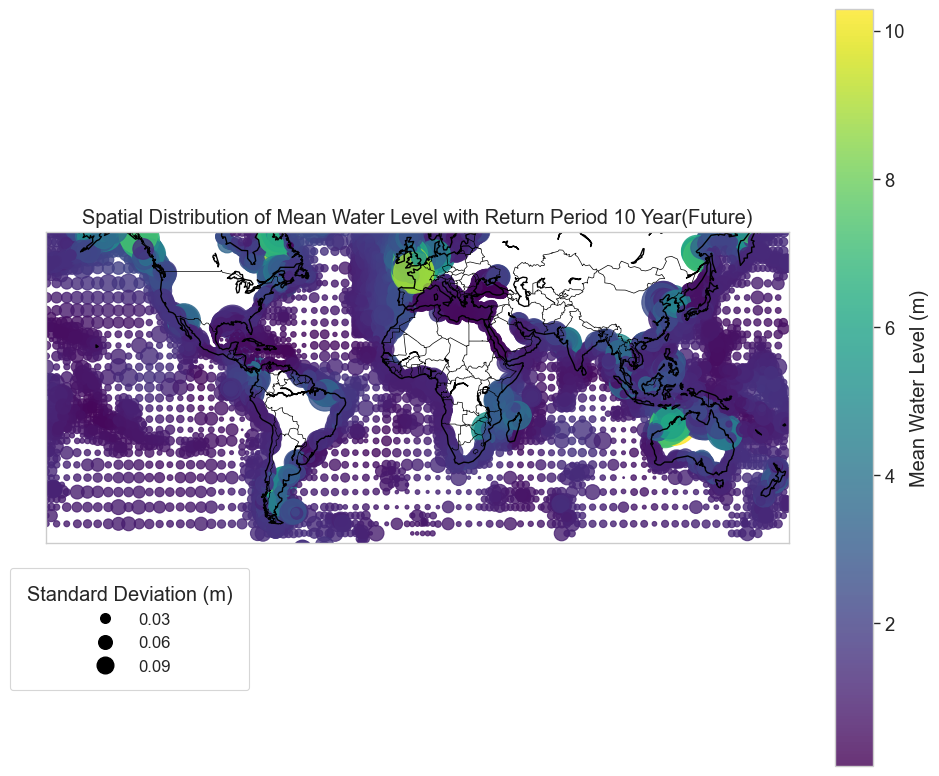

In [20]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines and country borders
m.drawcoastlines()
m.drawcountries()

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter
scatter_size = df_ensemble_std_rp10['ensemble_std_waterlevel'].values * 1600  # Adjust size scaling factor as needed
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['ensemble_mean_waterlevel'], s=scatter_size, cmap='viridis', alpha=0.8)

# Add a colorbar
plt.colorbar(sc, label='Mean Water Level (m)')

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import numpy as np
import pandas as pd


common_std_values = [0.03, 0.06, 0.09]  # Replace with your most common std dev values
# Calculate the scatter sizes for these common values
scatter_sizes_for_legend = [std_val * 1600 for std_val in common_std_values]

# Create legend handles with these sizes
handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                         markersize=np.sqrt(size), label=str(std_val)) 
           for size, std_val in zip(scatter_sizes_for_legend, common_std_values)]

# Adjust the legend's appearance and position it outside the bottom left of the plot
legend = plt.legend(handles=handles, title='Standard Deviation (m)', labelspacing=0.5, loc='lower left',
                    bbox_to_anchor=(-0.06, -0.5), handletextpad=1, borderpad=1, scatterpoints=1, fontsize='small')

# Improve layout
plt.tight_layout()

# Show the plot
plt.title('Spatial Distribution of Mean Water Level with Return Period 10 Year(Future)')
plt.show()



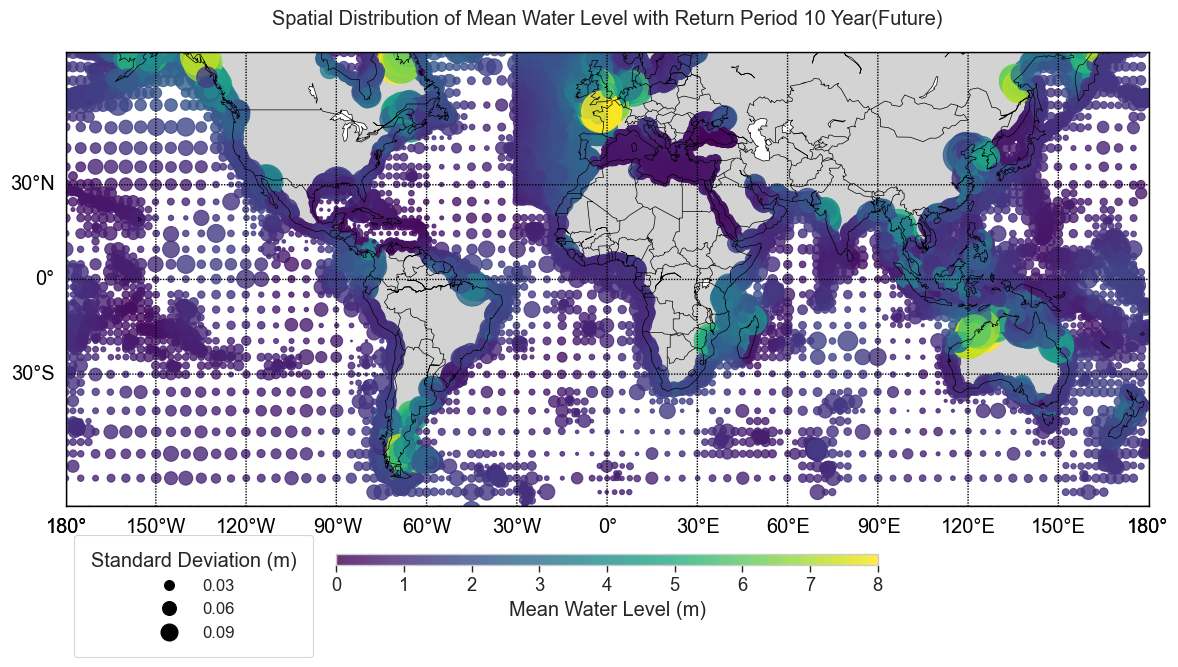

In [25]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.lines as mlines
import pandas as pd


# set the vmin and vmax for the colorbar
vmin = 0.0
vmax = 8.0

# Create a new figure
plt.figure(figsize=(12, 10))

# Create a Basemap instance
m = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=60, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Draw coastlines, country borders, and fill continents
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='#FFFFFF')

# Draw map boundaries and meridians and parallels grid
m.drawmapboundary(fill_color='#FFFFFF')
m.drawmeridians(np.arange(-180., 181., 30.), labels=[False, False, False, True])
m.drawparallels(np.arange(-90., 91., 30.), labels=[True, False, False, False])

# Convert station coordinates to map projection coordinates
x, y = m(df_ensemble_mean_rp10['station_x_coordinate'].values, df_ensemble_mean_rp10['station_y_coordinate'].values)

# Plot using scatter
scatter_size = df_ensemble_std_rp10['ensemble_std_waterlevel'].values * 1600  # Adjust size scaling factor as needed
sc = m.scatter(x, y, c=df_ensemble_mean_rp10['ensemble_mean_waterlevel'], s=scatter_size, cmap='viridis', alpha=0.8, vmin=vmin, vmax=vmax)

# Add a colorbar
plt.colorbar(sc, label='Mean Water Level (m)',orientation='horizontal', pad=0.05, aspect=50, shrink=0.5)

common_std_values = [0.03, 0.06, 0.09]  # Replace with your most common std dev values
# Calculate the scatter sizes for these common values
scatter_sizes_for_legend = [std_val * 1600 for std_val in common_std_values]

# Create legend handles with these sizes
handles = [mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                         markersize=np.sqrt(size), label=str(std_val)) 
           for size, std_val in zip(scatter_sizes_for_legend, common_std_values)]

# Adjust the legend's appearance and position it outside the bottom left of the plot
legend = plt.legend(handles=handles, title='Standard Deviation (m)', labelspacing=0.5, loc='lower left',
                    bbox_to_anchor=(0.0, -0.35), handletextpad=1, borderpad=1, scatterpoints=1, fontsize='small')

# Improve layout
plt.tight_layout()

# Show the plot
plt.title('Spatial Distribution of Mean Water Level with Return Period 10 Year(Future)',pad=20)
plt.show()

Spatial Distribution Maps:

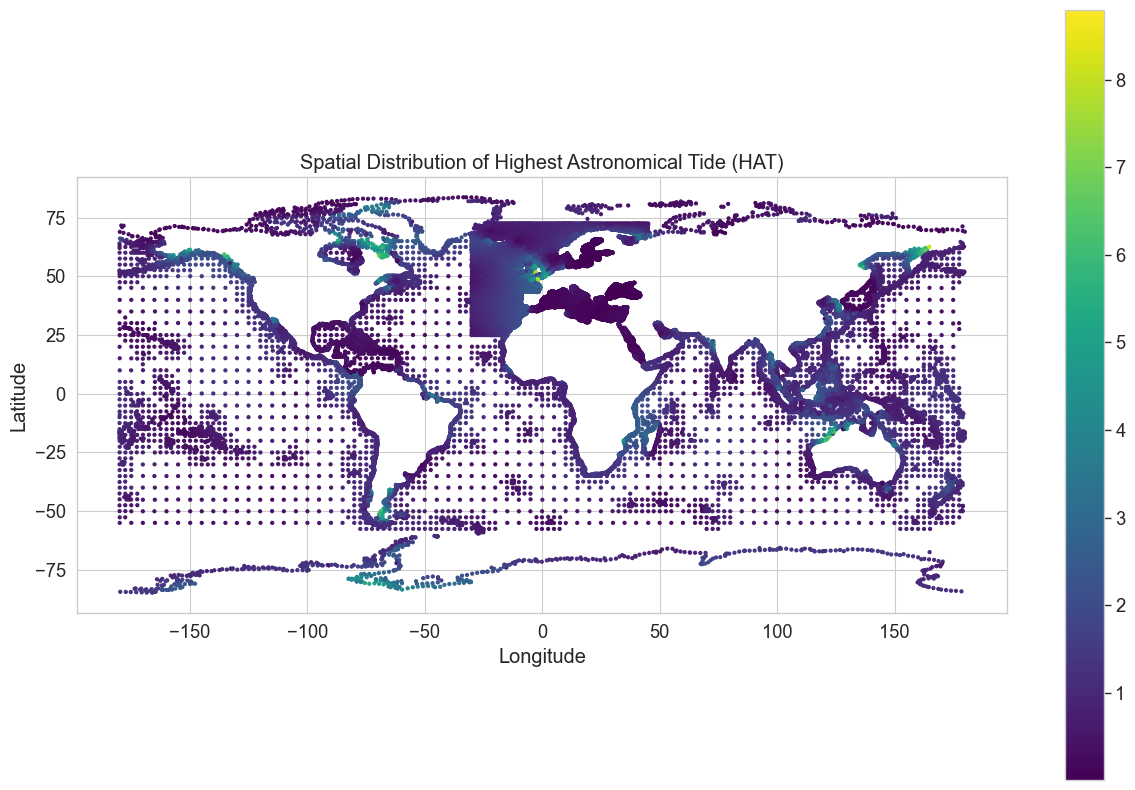

In [23]:
# Ensure that the GeoDataFrame has a coordinate reference system (CRS) set for mapping
gdf_merged.crs = "EPSG:4326"  # WGS84 Lat/Long

# Plotting the spatial distribution of HAT
gdf_merged.plot(column='HAT', legend=True, figsize=(15, 10),
                cmap='viridis', markersize=5)
plt.title('Spatial Distribution of Highest Astronomical Tide (HAT)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


 Correlation Analysis:

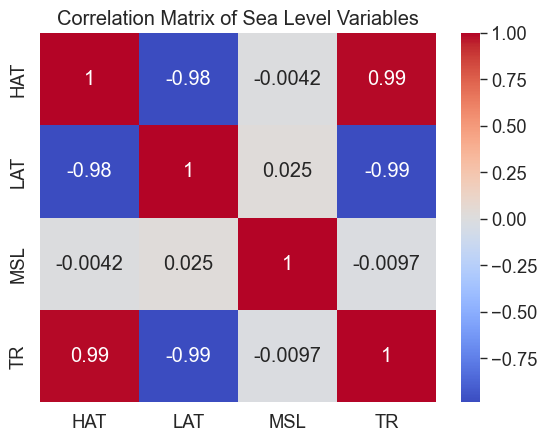

In [24]:
# Correlation matrix
correlation_matrix = df_merged[['HAT', 'LAT', 'MSL', 'TR']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sea Level Variables')
plt.show()


The Exploratory Data Analysis (EDA) you've conducted on the sea level data has provided several key insights:

1. **Descriptive Statistics**: The mean values of Highest Astronomical Tide (HAT) and Lowest Astronomical Tide (LAT) are roughly symmetrical but opposite in sign around the Mean Sea Level (MSL), which is expected as HAT and LAT represent extreme high and low tide levels, respectively. The average tidal range (TR) is about 1.43 meters, indicating the average difference between high and low tides across all stations.

2. **Distribution of MSL**: The histogram of MSL shows a peak around 0.15 to 0.2 meters, suggesting that most stations have their mean sea level within this range. The distribution is tightly clustered, indicating low variability in mean sea levels across stations globally.

3. **Box Plot Analysis**: The box plots reveal a number of outliers for each variable, particularly for HAT and TR. These outliers suggest there are stations with exceptionally high tide levels and tidal ranges, which might be of particular interest for coastal management and risk assessment.

4. **Spatial Distribution Map of HAT**: The map indicates that there is a significant geographical variation in the Highest Astronomical Tide (HAT). Some regions, potentially including parts of Australia, appear to experience higher astronomical tides than others. This spatial variability is crucial for local sea level rise impact assessments.

5. **Correlation Matrix**: The correlation matrix shows a very high negative correlation between HAT and LAT, and a very high positive correlation between HAT and TR. This is expected since higher high tides will correspond to lower low tides and a greater tidal range.

### Findings and Further Analysis for Australian Coastline:

- **High Tidal Variability**: Areas with a large tidal range (TR) and extreme HAT values could be more susceptible to the effects of sea level rise since they already experience greater variability and higher water levels.
  
- **Risk Assessment**: The presence of outliers in HAT and TR suggests that some regions could be at higher risk. For the Australian coastline, it would be important to identify which specific stations are the outliers and their exact locations.

- **Focus on Extremes**: Since extremes in HAT and LAT are critical in understanding potential flooding and ecological impacts, further analysis should focus on these stations along the Australian coast to prepare for high-risk scenarios.

### Using EDA to Inform Reporting:

- **Targeted Communication**: The EDA findings can help prioritize areas along the Australian coastline that may require more detailed study or immediate action due to their higher vulnerability to sea level changes.
  
- **Policy and Planning**: The analysis can inform policymakers about the regions where infrastructure might be at risk and where investment in coastal defenses could be most needed.

- **Public Awareness**: By visualizing the spatial distribution of HAT and other variables, you can effectively communicate to the public which areas might see more significant impacts from sea level rise.

- **Scientific Research**: The insights from the EDA could be used to guide more detailed scientific research into the causes of the observed spatial variability in sea level indicators along the Australian coast.

### Next Steps:

- **GIS Overlay**: Overlay the spatial distribution maps with detailed maps of the Australian coastline to pinpoint high-risk areas.
  
- **Local Data Integration**: Incorporate local datasets, such as coastal topology and current flood defenses, to refine the risk assessment.

- **Community Engagement**: Work with local communities and governments in identified high-risk areas to understand their specific concerns and to discuss potential adaptive strategies.

- **Monitoring and Adaptation**: Recommend setting up monitoring stations in key areas and developing localized sea level rise adaptation strategies.

In summary, the EDA has provided a solid foundation for understanding the spatial distribution of sea level rise indicators. For the Australian coastline, further localized analysis is needed to understand the risk and implement effective coastal management strategies.